In [78]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

pd.options.display.float_format = '{:,.4f}'.format

# Inputs and Parameters
# https://twitter.com/perfiliev/status/1489373536804347906?s=20&t=3XJNDZiTKefVeae3oB3j0A
filename = 'StockAndOptionQuoteForSCO.csv'

In [79]:
# Black-Scholes European-Options Gamma
def calcGammaEx(S, K, vol, T, r, q, optType, OI):
    if T == 0 or vol == 0:
        return 0

    dp = (np.log(S/K) + (r - q + 0.5*vol**2)*T) / (vol*np.sqrt(T))
    dm = dp - vol*np.sqrt(T) 

    if optType == 'call':
        gamma = np.exp(-q*T) * norm.pdf(dp) / (S * vol * np.sqrt(T))
        return OI * 100 * S * S * 0.01 * gamma 
    else: # Gamma is same for calls and puts. This is just to cross-check
        gamma = K * np.exp(-r*T) * norm.pdf(dm) / (S * S * vol * np.sqrt(T))
        return OI * 100 * S * S * 0.01 * gamma 

In [80]:
optionsFile = open(filename)
optionsFileData = optionsFile.readlines()
optionsFile.close()

#Get Spot
Spot_Price = float(optionsFileData[4].split(',')[0].replace("'", ""))
Name = optionsFileData[0].split(' ')[6]
#Get date
Date = optionsFileData[0].split(' ')[-2].replace("''","")



In [81]:
from datetime import datetime, timedelta

df = pd.read_csv(filename, delimiter = ',' , skiprows=11)

#df.drop(df.columns[[0, 1,-1,-2]], axis = 1, inplace = True)

df.drop(df.columns[[0, 1,28,29]], axis = 1, inplace = True)

x= ['Call_Delta','Call_Gamma','Call_Theta','Call_Vega','Call__OI','Call_Last','CALL LX','Call_IV','Call_BID',
              'Call_BX','Call_ASK','AX','Expiration_date','StrikePrice','Put Bid','Put BX','Put Ask','AX_PUT','Put_Delta',
              'Put_Gamma','Put_Theta','Put_Vega','Put__OI',
              'Put_Last', 'Put_LX', 'Put_IV']

#print(len(x))

df.columns =x
df = df[df.Call_Delta != "Delta"]
df = df[df.Call_Delta != "<empty>"]

df = df.dropna()
df=df.replace('--', 0)
df=df.replace('++', 0)
#df.drop(index=df[df['Call_Delta'] == 'Delta'].index, inplace=True)

#df.dropna(subset = ['Call_Delta'], inplace=True)
#df = df.replace(['--'],'0')
#d.set_option('display.max_columns', None)



In [82]:
df

,Call_Delta,Call_Gamma,Call_Theta,Call_Vega,Call__OI,Call_Last,CALL LX,Call_IV,Call_BID,Call_BX,...,Put Ask,AX_PUT,Put_Delta,Put_Gamma,Put_Theta,Put_Vega,Put__OI,Put_Last,Put_LX,Put_IV
0,1.00,.00,.00,.00,2,5.30,Z,0,4.50,W,...,.05,N,-.01,.00,-.01,.00,0,.05,B,803.29%
1,1.00,.00,.00,.00,5,4.46,B,0,3.70,T,...,.15,C,-.03,.02,-.03,.00,11,.10,B,627.02%
2,.92,.04,-.06,.00,11,2.50,B,567.79%,2.65,C,...,.10,C,-.04,.03,-.02,.00,298,.03,A,381.23%
3,1.00,.00,.00,.00,99,2.20,H,0,1.90,M,...,.05,H,-.04,.05,-.01,.00,668,.04,A,210.99%
4,.91,.18,-.01,.00,"10,878",1.10,J,126.77%,1.05,D,...,.15,M,-.16,.18,-.03,.00,"1,735",.14,A,183.37%
5,.56,.40,-.04,.00,"3,982",.41,C,137.59%,.40,N,...,.45,A,-.44,.36,-.04,.00,"1,673",.40,N,149.80%
6,.17,.30,-.02,.00,"5,270",.10,D,119.30%,.05,W,...,1.10,N,-.76,.27,-.03,.00,716,1.10,B,149.35%
7,.06,.12,-.01,.00,"3,330",.02,A,142.22%,0,N,...,2.10,H,-.84,.12,-.03,.00,704,1.92,A,197.58%
8,.05,.07,-.01,.00,"6,839",.02,E,187.10%,0,M,...,3.10,M,-.83,.07,-.04,.00,117,3.01,B,263.56%
9,.04,.05,-.01,.00,"2,756",.03,M,225.30%,0,M,...,4.30,C,-.79,.05,-.06,.00,28,4.30,N,343.24%


In [83]:
df['StrikePrice'] = df['StrikePrice'].astype(float)
df['Call_IV'] = df['Call_IV'].str.rstrip('%').astype('float') / 100.0
df['Put_IV'] = df['Put_IV'].str.rstrip('%').astype('float') / 100.0
df['Call_Gamma'] = df['Call_Gamma'].astype(float)
df['Put_Gamma'] = df['Put_Gamma'].astype(float)
df['Call__OI'] = df['Call__OI'].str.replace(",","").astype('float')
df['Put__OI'] = df['Put__OI'].str.replace(",","").astype('float')
df['Expiration_date'] = pd.to_datetime(df['Expiration_date'])
date_time_obj = datetime.strptime(Date, '%m/%d/%y')


In [84]:
df['Call Gamma Exposure'] = df['Call_Gamma'] * 100 * Spot_Price
df['Put Gamma Exposure'] = df['Put_Gamma'] * 100 * Spot_Price
# To further convert into 'per 1% move' quantity, multiply by 1% of spotPrice
df['CallGEX'] = df['Call_Gamma'] * df['Call__OI'] * 100 * Spot_Price * Spot_Price * 0.01
df['PutGEX'] = df['Put_Gamma'] * df['Put__OI'] * 100 * Spot_Price * Spot_Price * 0.01 * -1
df['TotalGamma'] = (df.CallGEX + df.PutGEX) / 10**9
dfAgg = df.groupby(['StrikePrice']).sum()
strikes = dfAgg.index.values
dfAgg

,Call_Gamma,Call__OI,Call_IV,Put_Gamma,Put__OI,Put_IV,Call Gamma Exposure,Put Gamma Exposure,CallGEX,PutGEX,TotalGamma
StrikePrice,,,,,,,,,,,
1.0000,0.0000,3.0000,0.0000,0.0000,0.0000,10.9122,0.0000,0.0000,0.0000,0.0000,0.0000
2.0000,0.0500,23.0000,6.7115,0.0700,13.0000,11.8135,30.0000,42.0000,6.4800,-9.3600,-0.0000
3.0000,0.1500,154.0000,9.4764,0.1400,482.0000,7.5379,90.0000,84.0000,214.2000,-573.8400,-0.0000
4.0000,0.2100,"1,287.0000",3.2436,0.2600,"1,137.0000",5.6514,126.0000,156.0000,"2,695.3200","-2,415.6000",0.0000
5.0000,0.5100,"14,119.0000",4.2816,0.4800,"2,962.0000",5.0089,306.0000,288.0000,"83,203.9200","-16,243.2000",0.0001
6.0000,0.7800,"12,771.0000",4.4404,0.7100,"2,673.0000",4.6575,468.0000,426.0000,"97,398.7200","-26,441.2800",0.0001
7.0000,0.6900,"15,906.0000",4.2659,0.6300,"1,346.0000",4.6283,414.0000,378.0000,"114,672.2400","-9,986.7600",0.0001
8.0000,0.4800,"11,598.0000",4.4358,0.4300,928.0000,5.2644,288.0000,258.0000,"55,955.1600","-3,881.1600",0.0001
9.0000,0.3800,"11,694.0000",5.0729,0.3100,303.0000,6.0039,228.0000,186.0000,"36,700.9200",-877.3200,0.0000


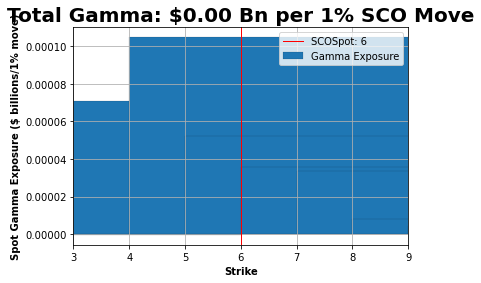

In [85]:
# To plot Gamma exposure 
#To limit it down to up and down 50%

from_strike = Spot_Price * 0.5
up_strike = Spot_Price * 1.5


plt.grid()
plt.bar(strikes, dfAgg['TotalGamma'].to_numpy(), width=6, linewidth=0.1, edgecolor='k', label="Gamma Exposure")
plt.xlim([from_strike, up_strike])
chartTitle = "Total Gamma: $" + str("{:.2f}".format(df['TotalGamma'].sum())) + " Bn per 1% " + Name + " Move"
plt.title(chartTitle, fontweight="bold", fontsize=20)
plt.xlabel('Strike', fontweight="bold")
plt.ylabel('Spot Gamma Exposure ($ billions/1% move)', fontweight="bold")
plt.axvline(x=Spot_Price, color='r', lw=1, label= Name + "Spot: " + str("{:,.0f}".format(Spot_Price)))
plt.legend()



plt.show()

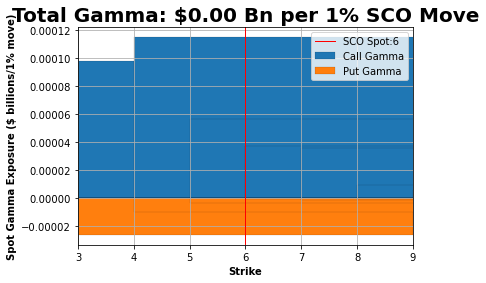

In [86]:
plt.grid()
plt.bar(strikes, dfAgg['CallGEX'].to_numpy() / 10**9, width=6, linewidth=0.1, edgecolor='k', label="Call Gamma")
plt.bar(strikes, dfAgg['PutGEX'].to_numpy() / 10**9, width=6, linewidth=0.1, edgecolor='k', label="Put Gamma")
plt.xlim([from_strike, up_strike])
chartTitle = "Total Gamma: $" + str("{:.2f}".format(df['TotalGamma'].sum())) + " Bn per 1% " +  Name + " Move"
plt.title(chartTitle, fontweight="bold", fontsize=20)
plt.xlabel('Strike', fontweight="bold")
plt.ylabel('Spot Gamma Exposure ($ billions/1% move)', fontweight="bold")
plt.axvline(x=Spot_Price, color='r', lw=1, label=Name + " Spot:" + str("{:,.0f}".format(Spot_Price)))
plt.legend()
plt.show()

In [87]:
levels = np.linspace(from_strike, up_strike, 60)
df['day_to_expiry'] = df['Expiration_date'] - date_time_obj
df['day_to_expiry'] = df.apply(lambda row: row.day_to_expiry.days, axis=1)
df['day_to_expiry'] = df['day_to_expiry']/262

In [88]:
totalGamma = []

for level in levels:
    df['callGammaEx'] = df.apply(lambda row : calcGammaEx(level, row['StrikePrice'], row['Call_IV'], 
                                                          row['day_to_expiry'], 0, 0, "call", row['Call__OI']), axis = 1)

    df['putGammaEx'] = df.apply(lambda row : calcGammaEx(level, row['StrikePrice'], row['Put_IV'], 
                                                         row['day_to_expiry'], 0, 0, "put", row['Put__OI']), axis = 1)    

    totalGamma.append(df['callGammaEx'].sum() - df['putGammaEx'].sum())
    
totalGamma = np.array(totalGamma) / 10**9


In [89]:
zeroCrossIdx = np.where(np.diff(np.sign(totalGamma)))[0]

negGamma = totalGamma[zeroCrossIdx]
posGamma = totalGamma[zeroCrossIdx+1]
negStrike = levels[zeroCrossIdx]
posStrike = levels[zeroCrossIdx+1]

# Writing and sharing this code is only possible with your support! 
# If you find it useful, consider supporting us at perfiliev.com/support :)
zeroGamma = posStrike - ((posStrike - negStrike) * posGamma/(posGamma-negGamma))
zeroGamma = zeroGamma[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

TypeError: unsupported format string passed to numpy.ndarray.__format__

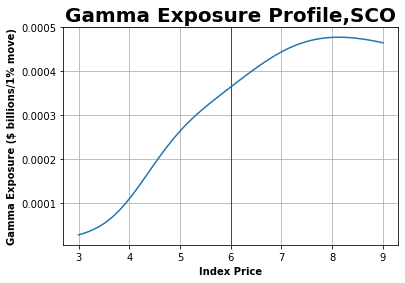

In [90]:
fig, ax = plt.subplots()
plt.grid()
plt.plot(levels, totalGamma, label="All Expiries")
#plt.plot(levels, totalGammaExNext, label="Ex-Next Expiry")
#plt.plot(levels, totalGammaExFri, label="Ex-Next Monthly Expiry")
chartTitle = "Gamma Exposure Profile," + Name
plt.title(chartTitle, fontweight="bold", fontsize=20)
plt.xlabel('Index Price', fontweight="bold")
plt.ylabel('Gamma Exposure ($ billions/1% move)', fontweight="bold")
plt.axvline(x=Spot_Price, color='r', lw=1, label= Name + " Spot: " + str("{:,.0f}".format(Spot_Price)))
plt.axvline(x=zeroGamma, color='g', lw=1, label="Gamma Flip: " + str("{:,.0f}".format(zeroGamma)))
plt.axhline(y=0, color='grey', lw=1)
plt.xlim([from_strike, up_strike])
trans = ax.get_xaxis_transform()
plt.fill_between([from_strike, zeroGamma], min(totalGamma), max(totalGamma), facecolor='red', alpha=0.1, transform=trans)
plt.fill_between([zeroGamma, up_strike], min(totalGamma), max(totalGamma), facecolor='green', alpha=0.1, transform=trans)
plt.legend()
plt.show()